In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
new_df=pd.read_csv("synthetic_asthma_dataset.csv")
df=new_df.copy()
df

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ASTH109995,70,Male,25.0,Never,0,NaN,Low,Sedentary,Indoor,NaN,0.67,0,580.6,18.7,0,NaN
9996,ASTH109996,78,Female,24.8,Never,0,Pollen,Low,Moderate,Indoor,Diabetes,0.72,1,417.6,40.8,0,NaN
9997,ASTH109997,58,Male,30.1,Former,1,Pollen,Low,Moderate,Indoor,NaN,0.28,0,459.1,20.3,1,Not Controlled
9998,ASTH109998,88,Female,31.2,Former,0,Pollen,Moderate,Moderate,Indoor,NaN,0.44,0,415.9,25.0,0,NaN


In [ ]:
df.shape

(10000, 17)

In [ ]:
#checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Allergies                10000 non-null  object 
 7   Air_Pollution_Level      10000 non-null  object 
 8   Physical_Activity_Level  10000 non-null  object 
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            10000 non-null  object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  FeNO_Level             

In [4]:
#Replacing NaN values
df['Asthma_Control_Level'] = df['Asthma_Control_Level'].fillna('Unknown')
df['Allergies'] = df['Allergies'].fillna('Unknown')
df['Comorbidities'] = df['Comorbidities'].fillna('Unknown')

In [ ]:
df.describe()

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.930700,25.053320,0.303400,0.497998,1.015900,400.884090,25.101420,0.243300
std,25.653559,4.874466,0.459749,0.224809,1.020564,97.531113,9.840184,0.429096
min,1.000000,15.000000,0.000000,0.000000,0.000000,150.000000,5.000000,0.000000
25%,23.000000,21.600000,0.000000,0.320000,0.000000,334.800000,18.200000,0.000000
50%,45.000000,25.000000,0.000000,0.500000,1.000000,402.500000,25.000000,0.000000
75%,67.000000,28.400000,1.000000,0.670000,2.000000,468.700000,31.700000,0.000000
max,89.000000,45.000000,1.000000,0.990000,6.000000,600.000000,63.900000,1.000000


<Axes: ylabel='count'>

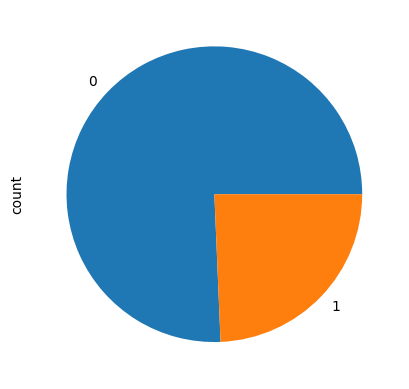

In [ ]:
df['Has_Asthma'].value_counts().plot(kind="pie",)
# 0--> No asthma
# 1--> Has asthma

<Axes: xlabel='count', ylabel='Gender'>

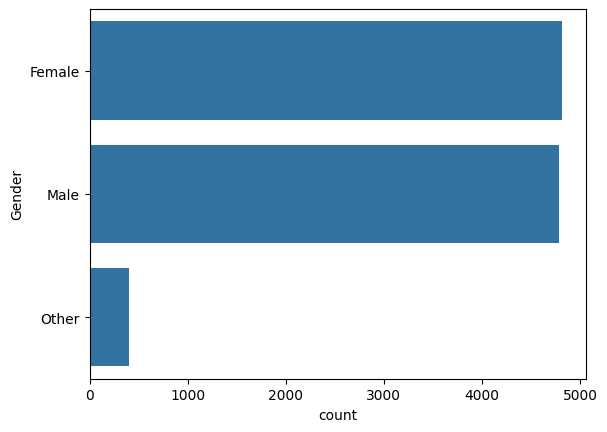

In [ ]:
#Gender Count
sns.countplot(df['Gender'])

/tmp/ipython-input-3776805194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],bins=30)


<Axes: xlabel='Age', ylabel='Density'>

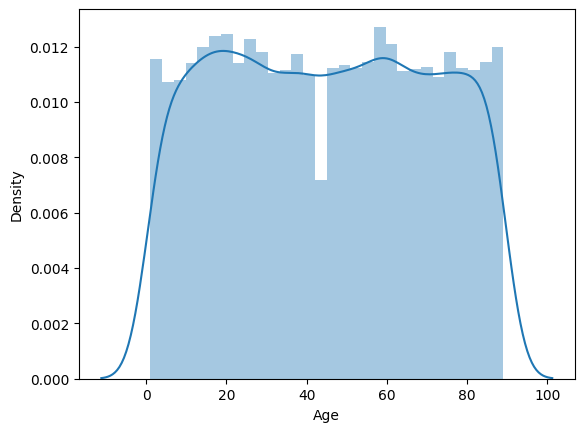

In [ ]:
sns.distplot(df['Age'],bins=30)

/tmp/ipython-input-1028345937.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(x=gen_df.index.get_level_values(0),y=gen_df.values,hue=gen_df.index.get_level_values(1),color='red')


<Axes: xlabel='Gender'>

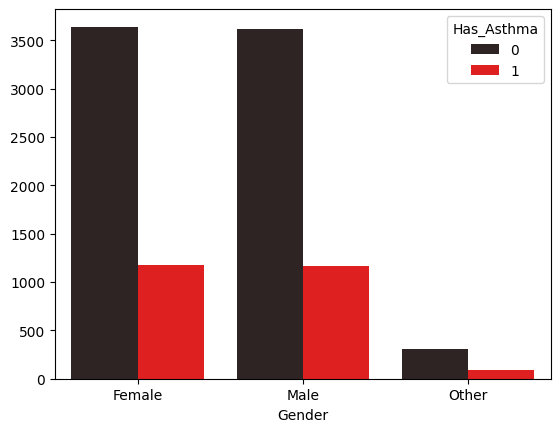

In [ ]:

gen_df=df.groupby('Gender')['Has_Asthma'].value_counts()
sns.barplot(x=gen_df.index.get_level_values(0),y=gen_df.values,hue=gen_df.index.get_level_values(1),color='red')


/tmp/ipython-input-2588721449.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.barplot(x=smk_df.index.get_level_values(0),y=smk_df.values,hue=smk_df.index.get_level_values(1),color='green')


<Axes: xlabel='Smoking_Status'>

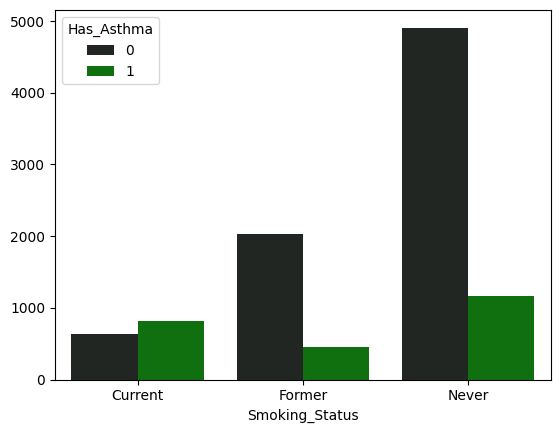

In [ ]:
smk_df=df.groupby('Smoking_Status')['Has_Asthma'].value_counts()
sns.barplot(x=smk_df.index.get_level_values(0),y=smk_df.values,hue=smk_df.index.get_level_values(1),color='green')
#Air_Pollution_Level

/tmp/ipython-input-247707282.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.barplot(x=apl_df.index.get_level_values(0),y=apl_df.values,hue=apl_df.index.get_level_values(1),color='purple')


<Axes: xlabel='Air_Pollution_Level'>

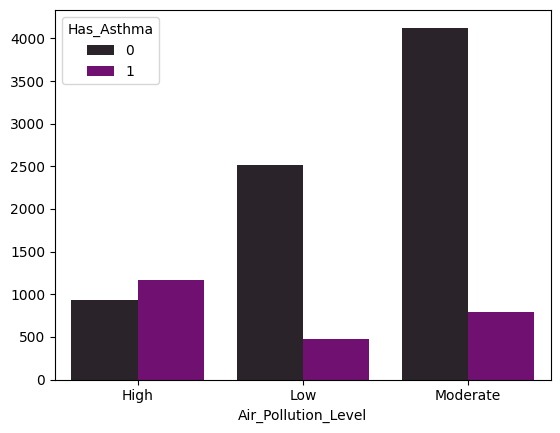

In [ ]:
apl_df=df.groupby('Air_Pollution_Level')['Has_Asthma'].value_counts()
sns.barplot(x=apl_df.index.get_level_values(0),y=apl_df.values,hue=apl_df.index.get_level_values(1),color='purple')

In [12]:
#removing patient column as it is non-informative
#df.drop(columns=['Patient_ID'])

df['Age_Group'] = pd.cut(df['Age'], bins=[0,18,35,50,65,100], labels=['Teen','Young','Adult','Mid','Senior'])

# 2. Encoding
target='Has_Asthma'
X = df.drop(target, axis=1)
y = df[target]
X_encoded = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3022
           1       1.00      1.00      1.00       978

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [10]:
y_test

,Has_Asthma
6252,0
4684,0
1731,0
4742,1
4521,0
...,...
4209,0
681,1
434,0
9309,1


In [11]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])